# Stroke Prediction Notebook


### By: Ashish Singh Bisht (1000039457)
### Prof. Vincenza Carchiolo
### Advance Machine Learning
### Data Science for Management

## Table of content

1. [Introduction](#Introduction)
2. [Data Overview](#Data_Overview)
3. [Exploratory Data Analysis](#Exploratory_Data_Analysis)
     3.1 [Male/Female who has more strokes.](#EDA1)
     3.2 [Male/Female who has more strokes.](#EDA2)
     3.3 [Male/Female who has more strokes.](#EDA3)
     3.4 [Male/Female who has more strokes.](#EDA4)
     3.5 [Male/Female who has more strokes.](#EDA5)
     3.6 [Male/Female who has more strokes.](#EDA6)
     3.7 [Male/Female who has more strokes.](#EDA7)
     3.8 [Male/Female who has more strokes.](#EDA8)
     3.9 [Male/Female who has more strokes.](#EDA9)
     3.10 [Male/Female who has more strokes.](#EDA10)
     3.11 [Correaltion](#EDA11)
4. [Data Preprocessing](#Data_Preprocessing)
5. [Supervised Learning](#Supervised_Learning)
     5.1 [Model Fitting](#Model_Fitting)
     5.2 [Train set odeling](#TrainSM)
     5.3 [Cross Validation](#CrossVal)
     5.5 [ConfMat](#ConfMat)
     5.6 [Grid Search](#GridSearch)
6. [Unsupervised Learning](#Unsupervised_Learning)
     6.1 [Data Preprocessing](#DPU)
     6.2 [Principal Component Analysis](#PCA)
     6.3 [KMeans Clustering](#KMC)
     6.4 [DBScan](#DBS)
     6.5 [Hierarchical Clustering](#HRC)
7. [Semi-Supervised Learning](#Semi_Supervised_Learning)
     7.1 [Label Propagation](#LabelP)     
8. [Comparision with other studies](#CWOS)


## 1. Introduction <a name="Introduction"></a>

Stroke is a life-threatening medical condition that occurs when blood flow to the brain is interrupted. It is the second leading cause of death and a major cause oof long-term disability worldwide. Early detection and prevention of stroke are crucial to reducing its impact on the individuals and society.

The Stroke Prediction Dataset on Kaggle provides a collection of health-related data that can be used to predict the likelihood of an individual experiencing a stroke. The dataset includes demographic, lifestyle, and clinical variables such as age, gender, smoking status, hypertension, heart disease, and glucose levels, among others. The dataset contains data from over 43,000 individuals across 12 countries.


We can access the dataset on Kaggle:
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset




<h4>Attribute Information </h4>

The Stroke Prediction Dataset contains 12 features (or columns) and 5110 instances (or rows). Here's a brief description of each feature:

1.	id:               unique identifier
2.	gender:           "Male", "Female", or "Other"
3.	age:               age of the individual in years
4.	hypertension:      1 if yes, 0 otherwise
5.	heart_disease:     1 if yes, 0 otherwise
6.	ever_married:      "Yes" or "No"
7.	work_type:         "Private", "Self-employed", "Govt_job", "Children", or "Never_worked"
8.	Residence_type:    "Urban" or "Rural"
9.	avg_glucose_level: average glucose level in blood
10.	bmi:               body mass index
11.	smoking_status:    "formerly smoked", "never smoked", "smokes", or "Unknown"
12.	stroke:            1 if the individual had a stroke, 0 otherwise


This dataset can be used to explore the relationships between these variables and the likelihood of experiencing a stroke, as well as to develop predictive models to identify high-risk individuals who may benefit from early interventions.


## 2. Data Overview<a name="Data_Overview"></a>

We start by including the basic libraries for the data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("/Users/ash/Downloads/healthcare-dataset-stroke-data 2.csv")

After storing the dataset into 'df' I have removed the column 'id' as it serves no purpose in our analysis

In [3]:
df.drop(columns=['id'],inplace = True,axis = 1)

Here we can see the initial and the last 5 rows of our dataset. We do this just by stating the variable name of the dataset.

In [4]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<h3> -> Questions to ask</h3>
<h5> 1) Male/Female who has more strokes.</h5>
<h5> 2) People of which age group are more likely to get a stroke.</h5>
<h5> 3) Is hypertension a cause?</h5>
<h5> 4) A person with heart disease is more likely to get a stroke (need confirmation).</h5>
<h5> 5) Marriage may be a cause of strokes.</h5>
<h5> 6) People working in private jobs may be the majority of people with strokes(mostly cause of stress).</h5>
<h5> 7) Evaluating the neumerical variables with the target variable</h5>
<h5> 8) People living in urban areas have more chances of getting stroke?</h5>
<h5> 9) BMI must be closely observed with age and gender.</h5>
<h5>10) People who smoke are more likely to get a stroke (need confirmation).</h5>

In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
print(df.shape)

(5110, 11)


In [7]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Observations :
<p>1.BMI contains missing values.</p>
<p>2.The average age is 43.</p>
<p>3.The average bmi is 28 (will change after imputation).</p>
<p>4.The minimum age is questionable.</p>
<p>5.Average glucose level is 106 (can be useful later).</p>

# 3. Exploratory Data Analysis  <a name="Exploratory_Data_Analysis"></a>

In this part I have Done EDA for our data

In [9]:
df=df.fillna(np.mean(df['bmi']))

We handled missing values and filled the missing values with the mean.

In [10]:
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [11]:
print(df.shape)

(5110, 11)


In [12]:
print(df.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


<AxesSubplot:xlabel='stroke', ylabel='count'>

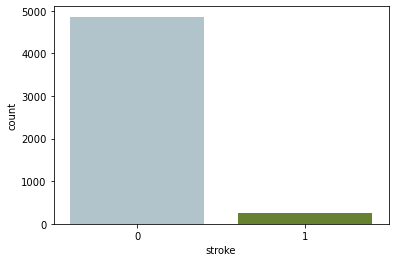

In [13]:
colors = ["#AEC6CF","#6B8E23", "#B39EB5", "#C44E52"]
sns.countplot(data=df,x='stroke', palette=colors)

### 1) Male/Female who has more strokes. <a name="EDA1"></a>

Text(0.5, 1.0, 'The division of data by Geder')

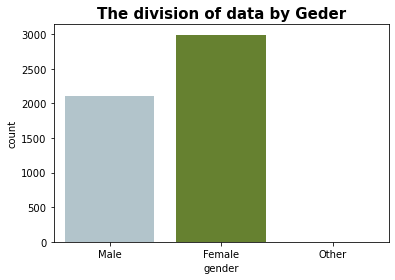

In [14]:
sns.countplot(x="gender", data=df, palette=colors)
plt.title ("The division of data by Geder",weight='bold', size=15)

In [15]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [16]:
df['gender'] = df['gender'].apply(lambda x : 1 if x == 'Male' else 0) 

0    2995
1    2115
Name: gender, dtype: int64

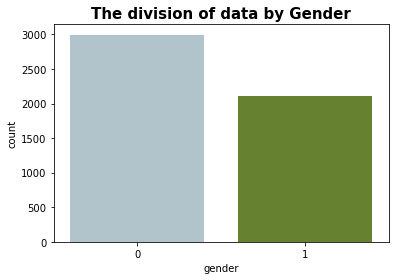

In [17]:
sns.countplot(x="gender", data=df, palette=colors)
plt.title ("The division of data by Gender",weight='bold', size=15)
df['gender'].value_counts()

### 2) People of which age group are more likely to get a stroke. <a name="EDA2"></a>

In [18]:
# Group the data by age and count the number of strokes in each age group
age_counts = df.loc[df['stroke'] == 1, 'age'].value_counts()

# Print the 10 age groups with the highest stroke counts
print(age_counts.head(10))

78.0    21
80.0    17
79.0    17
81.0    14
57.0    11
76.0    10
63.0     9
74.0     9
68.0     9
82.0     9
Name: age, dtype: int64


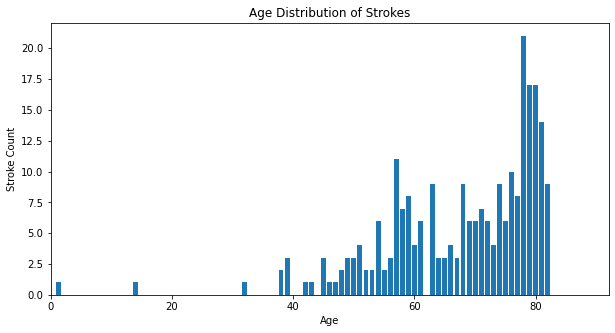

In [19]:
# Plot a bar chart of the age counts
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(age_counts.index, age_counts.values)

# Set the chart title and axis labels
ax.set_title('Age Distribution of Strokes')
ax.set_xlabel('Age')
ax.set_ylabel('Stroke Count')

# Set the x-axis to start from 0 and end at the maximum age plus 10 years
ax.set_xlim([0, max(age_counts.index) + 10])

# Show the plot
plt.show()


### 3) Is hypertension a cause?<a name="EDA3"></a>

Text(-0.7, 220, 'Hypertension and Stroke')

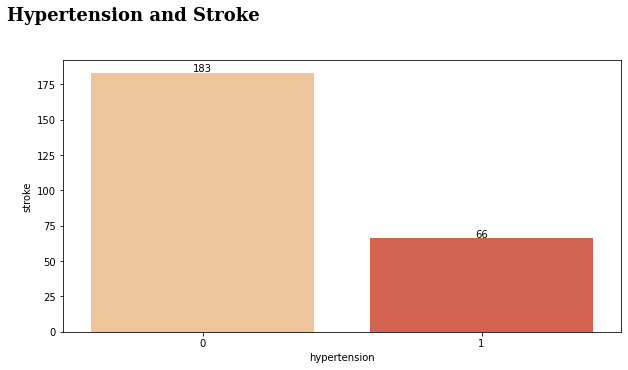

In [20]:
#creating a pivot table with stroke count by hypertension
pd_stroke = pd.pivot_table(data=df[df['stroke']==1], index=df['hypertension'], values='stroke', aggfunc='count').reset_index()
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(ax=ax, x=pd_stroke['hypertension'], y=pd_stroke['stroke'], palette='OrRd')
#add text labels for each bar
for idx, val in enumerate(pd_stroke['stroke']):
    ax.text(idx, val+1, round(val, 1), horizontalalignment='center')
plt.text(-0.7, 220, 'Hypertension and Stroke', fontsize=18, fontweight='bold', fontfamily='serif')



### 4) A person with heart disease is more likely to get a stroke.<a name="EDA5"></a>

Text(-0.7, 220, 'Heart Disease and Stroke')

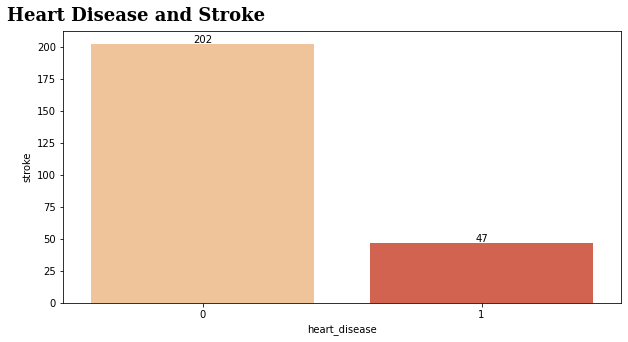

In [21]:
# create a pivot table with stroke count by heart disease
pd_stroke = pd.pivot_table(data=df[df['stroke']==1], index=df['heart_disease'], values='stroke', aggfunc='count').reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(ax=ax, x=pd_stroke['heart_disease'], y=pd_stroke['stroke'], palette='OrRd')

# add text labels for each bar
for idx, val in enumerate(pd_stroke['stroke']):
    ax.text(idx, val+1, round(val, 1), horizontalalignment='center')


# add plot title
plt.text(-0.7, 220, 'Heart Disease and Stroke', fontsize=18, fontweight='bold', fontfamily='serif')



### 5) Marriage may be a cause of strokes<a name="EDA6"></a>

<AxesSubplot:xlabel='ever_married', ylabel='count'>

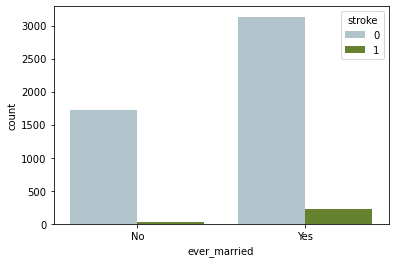

In [22]:
# Group the data by stroke and marriage columns, and count the number of occurrences in each group
pd_stroke_marriage = df.groupby(['stroke', 'ever_married'])['stroke'].count().reset_index(name='count')

# Plot a grouped bar plot
sns.barplot(x='ever_married', y='count', hue='stroke', data=pd_stroke_marriage , palette = colors)


### 6) People working in private jobs may be the majority of people with strokes(mostly cause of stress).

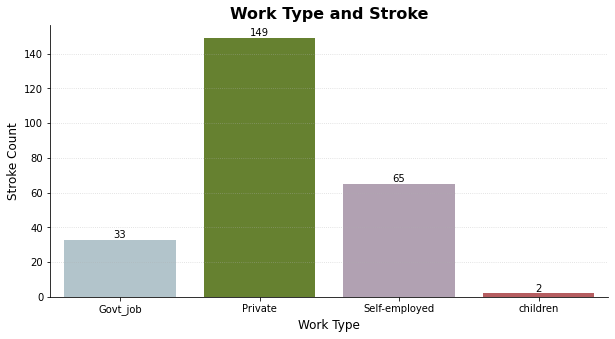

In [23]:
# Create a pivot table for stroke count by work type
pd_stroke = df[df['stroke'] == 1].pivot_table(index='work_type', values='stroke', aggfunc='count').reset_index()

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='work_type', y='stroke', data=pd_stroke, palette=colors, ax=ax)

# Add labels and formatting
ax.set_xlabel('Work Type', fontsize=12)
ax.set_ylabel('Stroke Count', fontsize=12)
ax.set_title('Work Type and Stroke', fontsize=16, fontweight='bold')
ax.grid(axis='y', linestyle=':', alpha=0.5)
sns.despine()

# Add data labels to the bars
for idx, val in enumerate(pd_stroke['stroke']):
    ax.text(idx, val+1, round(val, 1), ha='center', fontsize=10)


### 7) Evaluating the neumerical variables with the target variable<a name="EDA7"></a>

In [24]:
# Classifying data into numerical and categorical variables.
df_numerical=df[['age','avg_glucose_level','bmi']]
df_categorical=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

Text(0.5, 1.0, 'Kde Plots for age, avg_glucose_level and bmi')

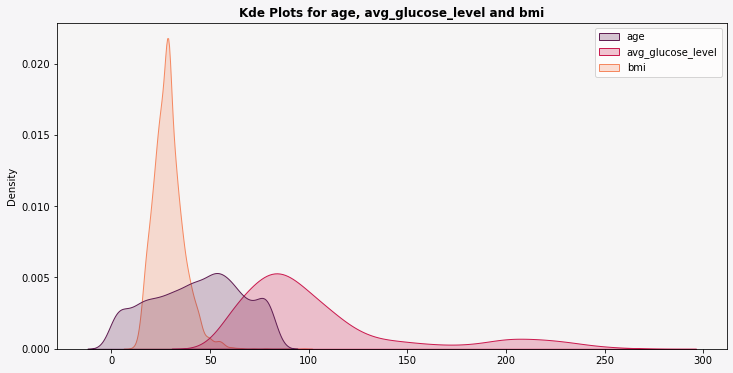

In [25]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7') ## colour outside the graph 
ax.set_facecolor('#f6f5f5') ##colour inside the graph
sns.kdeplot(data=df_numerical,shade=True,palette='rocket') # Distributions

plt.title('Kde Plots for age, avg_glucose_level and bmi',weight='bold')

In [26]:
# Skewness and kurtosis
s_k=[]
for i in df_numerical.columns:
    s_k.append([i,df_numerical[i].skew(),df_numerical[i].kurt()])
skew_kurt=pd.DataFrame(s_k,columns=['Columns','Skewness','Kurtosis'])
skew_kurt

,Columns,Skewness,Kurtosis
0,age,-0.137059,-0.991010
1,avg_glucose_level,1.572284,1.680479
2,bmi,1.076716,3.623061


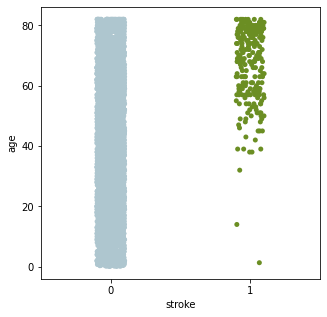

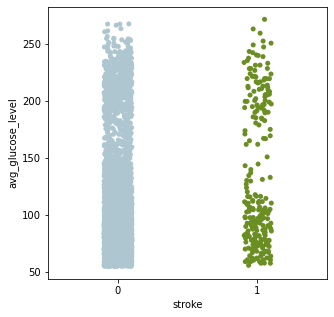

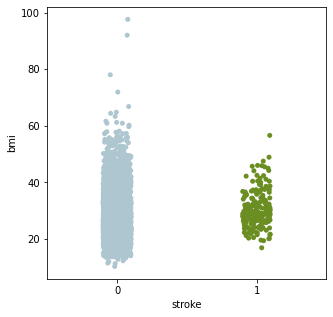

In [27]:
# Strip plot of numerical variables with respect to stroke
for col in df_numerical.columns:
    plt.figure(figsize=(5,5))
    sns.stripplot(data=df, x='stroke', y=col , palette = colors)
    plt.show()



### 8) People living in urban areas have more chances of getting stroke? (need to confirm)<a name="EDA8"></a>

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

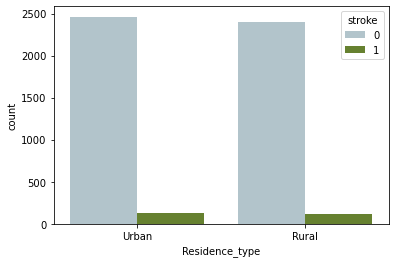

In [28]:
import seaborn as sns

# Create a bar plot of stroke counts based on residence type
sns.countplot(data=df, x='Residence_type', hue='stroke', palette = colors)


### 9) BMI must be closely observed with age and gender.<a name="EDA9"></a>

<AxesSubplot:xlabel='age', ylabel='bmi'>

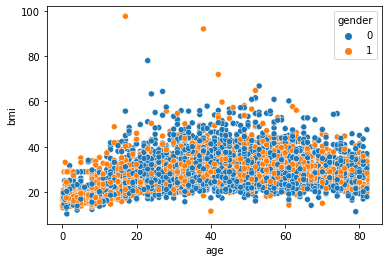

In [29]:
#In this scatterplot we can observe the relationship between age, bmi and gender.
sns.scatterplot(data=df, x="age", y="bmi", hue="gender")


### 10) People who smoke are more likely to get a stroke (need confirmation).<a name="EDA10"></a>

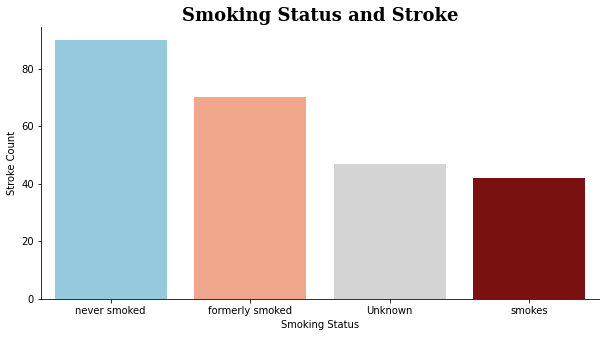

In [30]:
pd_stroke = df[df['stroke']==1]['smoking_status'].value_counts().reset_index()
pd_stroke.columns = ['smoking_status', 'stroke_count']
colors1 = ["#87CEEB","#FFA07A","#D4D4D4","#8B0000"]
plt.figure(figsize=(10, 5))
sns.barplot(data=pd_stroke, x='smoking_status', y='stroke_count', palette = colors1)
plt.title('Smoking Status and Stroke', fontsize=18, fontweight='bold', fontfamily='serif')
plt.xlabel('Smoking Status')
plt.ylabel('Stroke Count')
sns.despine()
plt.show()


### Correlation <a name="EDA11"></a>

Text(0.5, 1.0, 'kendall correlation')

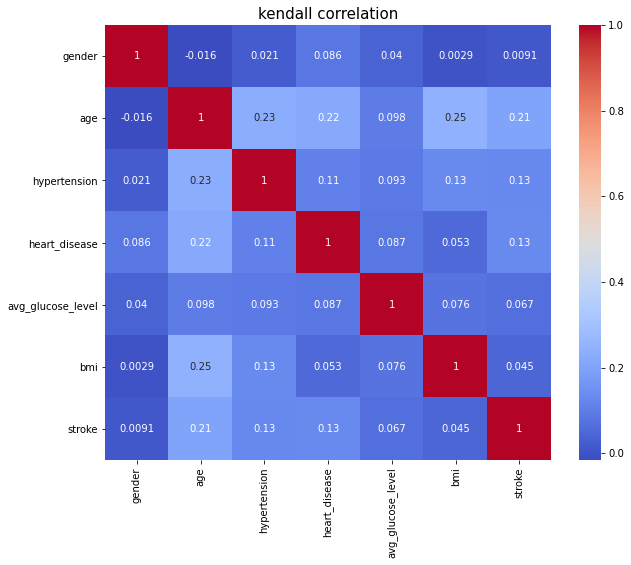

In [31]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(method = "kendall"), cmap = 'coolwarm', annot = True);
plt.title("kendall correlation",fontsize = 15)

Text(0.5, 1.0, 'Spearmen correlation')

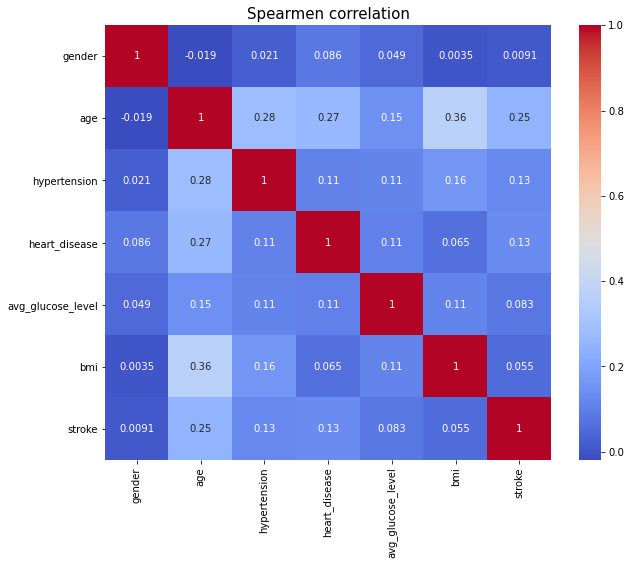

In [32]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(method = "spearman"), cmap = 'coolwarm', annot = True);
plt.title("Spearmen correlation",fontsize = 15)

# 4. Data Preprocessing<a name="Data_Preprocessing"></a>

Firest convert categorical variables to binary variables.
We already converted gender above

In [33]:
df['Residence_type'] = df['Residence_type'].apply(lambda x : 1 if x == 'Urban' else 0)
df['ever_married'] = df['ever_married'].apply(lambda x : 1 if x == 'Yes' else 0)

# Remove observations with unknown smoking status
df = df[df['smoking_status'] != 'Unknown']


I now have performed One Hot encoding on the dataset. 

In [34]:
# One Hot encoding smoking_status, work_type
df_dummies = df[['smoking_status','work_type']]
df_dummies=pd.get_dummies(df_dummies)
df.drop(columns=['smoking_status','work_type'],inplace=True)

In [35]:
df_stroke=df['stroke']
df.drop(columns=['stroke'],inplace=True)
df=df.merge(df_dummies,left_index=True, right_index=True,how='left')

Here I have removed the Target variable 'stroke' from the dataset after storing it into the 'df_stroke' variable

Now I have split the dataset into test and training model with the test train split command. 

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,df_stroke,test_size=0.25,random_state=0)

In this case, 25% of the dataset will be reserved for testing, and the remaining 75% will be used for training.


Now I started Standardizing our training and testing data. 
<p>It would make sure that every feature is important for the analysis as it scales the data</p>

In [37]:
# Standardizing our training and testing data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#We perform feature scaling after splitting the data into training and testing sets in order to avoid data leakage.

In [38]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=4)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

We used SMOTE (Synthetic Minority Over-sampling Technique) is a data augmentation technique used in machine learning to address the problem of class imbalance. It works by creating new synthetic examples of the minority class by interpolating between existing examples, and can help to balance the class distribution in the dataset and improve the performance of machine learning algorithms.

In [39]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,0,1,0,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.400000,0,0,1,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.000000,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0,57.0,0,0,1,0,77.93,21.700000,0,1,0,0,0,1,0,0
5105,0,80.0,1,0,1,1,83.75,28.893237,0,1,0,0,0,1,0,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,1,0,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,1,0,0,0,0,1,0


# 5. SUPERVISED LEARNING <a name="Supervised_Learning"></a>

Supervised learning is a type of machine learning algorithm in which the computer learns from labeled data to make predictions or decisions about new, unseen data. It is typically divided into two categories: regression and classification, and is commonly used in a wide range of applications, such as image recognition, natural language processing, and predictive analytics.

In [40]:
##Importing the models

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
import xgboost

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

I started by importing the useful libraries for the Supervised Learning algorithms. 

Now we create a dictionary called 'models' that contains different classification models, which can be used to train and make predictions on the dataset. 
<p>Each model is instantiated with different hyperparameters, such as class_weight that specifies the relative weights of the different classes in the target variable. </p>
<p>In Decision Tree the weight of the positive class (1) is set to twice the weight of the negative class (0). This can be useful to address class imbalance problems in the dataset.</p>

In [41]:
models = dict()
models['Decision Tree'] = DecisionTreeClassifier(class_weight={0:1,1:2}) 
models['Random Forest'] = RandomForestClassifier(class_weight={0:1,1:2})
models['Logreg'] = LogisticRegression()
models['GradientBoost'] = GradientBoostingClassifier()
models['AdaBoost'] = AdaBoostClassifier()
models['XGBoost'] = xgboost.XGBClassifier()
models['SVM']= SVC(probability=True)
models['KNeighbors']= KNeighborsClassifier()

## 5.1 Model Fitting<a name="Model_Fitting"></a>

In [42]:
for model in models:
    models[model].fit(x_train, y_train)
    print(model + ' : fit')

Decision Tree : fit
Random Forest : fit
Logreg : fit
GradientBoost : fit
AdaBoost : fit
XGBoost : fit
SVM : fit
KNeighbors : fit


## 5.2 Train set Modeling<a name="TrainSM"></a> 

In [43]:
 print("Train set prediction")
for x in models:
        
    print('------------------------'+x+'------------------------')
    model = models[x]
    y_train_pred = model.predict(x_train)
    arg_train = {'y_true':y_train, 'y_pred':y_train_pred}
    print(confusion_matrix(**arg_train))
    print(classification_report(**arg_train))

Train set prediction
------------------------Decision Tree------------------------
[[2521    0]
 [   0 2521]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2521
           1       1.00      1.00      1.00      2521

    accuracy                           1.00      5042
   macro avg       1.00      1.00      1.00      5042
weighted avg       1.00      1.00      1.00      5042

------------------------Random Forest------------------------
[[2521    0]
 [   0 2521]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2521
           1       1.00      1.00      1.00      2521

    accuracy                           1.00      5042
   macro avg       1.00      1.00      1.00      5042
weighted avg       1.00      1.00      1.00      5042

------------------------Logreg------------------------
[[1819  702]
 [ 463 2058]]
              precision    recall  f1-score   support

          

The performance on train set is (too) good. That's because we use SMOTE. It makes model learn very well because of having a perfect balance dataset.
<p>Next, We will perform Cross Validation.</p>

## 5.3 Cross Validation<a name="CrossVal"></a> 

Cross-validation is a technique used in machine learning to evaluate the performance of a model by splitting the dataset into multiple partitions or folds(ex- 10x fold Cross Validation), training the model on some folds and testing it on others, and repeating the process multiple times to obtain a more accurate estimate of the model's generalization performance

In [44]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [45]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [46]:
for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')
    print(f'{name} Accuracy: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

Decision Tree Accuracy: 0.877 +/- 0.013
Random Forest Accuracy: 0.942 +/- 0.003
Logreg Accuracy: 0.766 +/- 0.007
GradientBoost Accuracy: 0.882 +/- 0.005
AdaBoost Accuracy: 0.833 +/- 0.011
XGBoost Accuracy: 0.947 +/- 0.004
SVM Accuracy: 0.862 +/- 0.007
KNeighbors Accuracy: 0.887 +/- 0.008


This shows the mean accuracy and standard deviation for each model's performance on the training data, averaged over five different folds of the data.

## 5.4 Test set Modeling<a name="TestSM"></a> 

In [47]:
print("Test set prediction")
for x in models:
        
    print('------------------------'+x+'------------------------')
    model = models[x]
    y_test_pred = model.predict(x_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}
    print(confusion_matrix(**arg_test))
    print(classification_report(**arg_test))

Test set prediction
------------------------Decision Tree------------------------
[[742 101]
 [ 40   9]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       843
           1       0.08      0.18      0.11        49

    accuracy                           0.84       892
   macro avg       0.52      0.53      0.51       892
weighted avg       0.90      0.84      0.87       892

------------------------Random Forest------------------------
[[789  54]
 [ 42   7]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       843
           1       0.11      0.14      0.13        49

    accuracy                           0.89       892
   macro avg       0.53      0.54      0.53       892
weighted avg       0.90      0.89      0.90       892

------------------------Logreg------------------------
[[626 217]
 [ 16  33]]
              precision    recall  f1-score   support

           0       0.98

The best model for our testing data was the XGBoost, as it outperforms all the other models.
With the accuracy rate of 92%.

## 5.5 Confusion Matrix <a name="ConfMat"></a> 

In [48]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Train each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print confusion matrix
    print(f"Confusion matrix for {name}:")
    print(cm)


Confusion matrix for Decision Tree:
[[741 102]
 [ 38  11]]
Confusion matrix for Random Forest:
[[797  46]
 [ 43   6]]
Confusion matrix for Logreg:
[[626 217]
 [ 16  33]]
Confusion matrix for GradientBoost:
[[769  74]
 [ 35  14]]
Confusion matrix for AdaBoost:
[[685 158]
 [ 23  26]]
Confusion matrix for XGBoost:
[[817  26]
 [ 42   7]]
Confusion matrix for SVM:
[[691 152]
 [ 28  21]]
Confusion matrix for KNeighbors:
[[694 149]
 [ 33  16]]


Here we have the confusion matrix of all the models.

Even though we have the best model for our testing data I still wanted to do a grid search on the Random forest.
Just to see if it will give me better results.

## 5.6 Grid Search <a name="GridSearch"></a> 

Grid search is a hyperparameter tuning technique used in machine learning to find the best combination of hyperparameters for a given model. Hyperparameters are parameters that are not learned from data, but are set before training the model, such as the learning rate, regularization parameter, number of hidden layers in a neural network, etc. The choice of hyperparameters can have a significant impact on the performance of the model, and finding the optimal values can be a time-consuming and iterative process.
<p>Grid search simplifies this process by creating a grid of all possible combinations of hyperparameter values, and evaluating the performance of the model on each combination using cross-validation. The optimal hyperparameters are then selected based on the highest cross-validation score.</p>




In [49]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [ 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Define the random forest model
rf_model = RandomForestClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy score: ", grid_search.best_score_)


Best hyperparameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy score:  0.9438739833561438


After performing the Grid Search we can oberserve that the Random forest is now outperforming the XGBoost.
The accuracy of default XGBoost was 92 and now the accuracy of the Random forest after changing the hyperparameters is 94.4.

# 6. Unsupervised Learning <a name="Unsupervised_Learning"></a>

Unsupervised learning is a type of machine learning where the algorithm is trained on a dataset without any labeled output or target variable. The goal of unsupervised learning is to identify patterns, relationships, and structure within the data itself. Unsupervised learning algorithms do not have a specific objective or goal, unlike supervised learning algorithms which aim to predict a target variable based on input variables.

In unsupervised learning, the algorithms use statistical techniques to identify patterns and groupings within the data, such as clustering or dimensionality reduction.

## 6.1 Data Processing <a name="DPU"></a> 

In [50]:
data= pd.read_csv("/Users/ash/Downloads/healthcare-dataset-stroke-data 2.csv")

In [51]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [53]:
mean_value = data['bmi'].mean()
data['bmi'].fillna(value = mean_value, inplace = True) 

In [54]:
data['age'] = (data['age'].apply(np.ceil)).astype('int64')

In [55]:
data['gender'] = data['gender'].apply(lambda x : 1 if x == 'Male' else 0) 

In [56]:
data.drop(data[data.smoking_status == 'Unknown'].index, inplace = True)

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
data['gender'] = data[['gender']].apply(le.fit_transform)
data['ever_married'] = data[['ever_married']].apply(le.fit_transform)
data ['Residence_type'] = data[['Residence_type']].apply(le.fit_transform)
data['work_type'] = data[['work_type']].apply(le.fit_transform)
data ['smoking_status'] = data[['smoking_status']].apply(le.fit_transform)

In [58]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,228.69,36.600000,0,1
1,51676,0,61,0,0,1,3,0,202.21,28.893237,1,1
2,31112,1,80,0,1,1,2,0,105.92,32.500000,1,1
3,60182,0,49,0,0,1,2,1,171.23,34.400000,2,1
4,1665,0,79,1,0,1,3,0,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,45010,0,57,0,0,1,2,0,77.93,21.700000,1,0
5105,18234,0,80,1,0,1,2,1,83.75,28.893237,1,0
5106,44873,0,81,0,0,1,3,1,125.20,40.000000,1,0
5107,19723,0,35,0,0,1,3,0,82.99,30.600000,1,0


Here as the in the dataset there was a column of work type where one of the attribute was children we here find out the number of thm and remove them as they are not important for the analysis

In [59]:
#Extract the data containing children information
nos_of_children = data[data['work_type'] == 4]
nos_of_children_count = nos_of_children['work_type'].count()
print (nos_of_children_count)

nos_of_children.describe()

69


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,69.000000,69.000000,69.000000,69.0,69.0,69.0,69.0,69.000000,69.000000,69.000000,69.000000,69.0
mean,39029.478261,0.507246,12.347826,0.0,0.0,0.0,4.0,0.521739,101.737391,23.111496,0.840580,0.0
std,19473.985582,0.503610,1.634428,0.0,0.0,0.0,0.0,0.503187,34.917983,5.737176,0.441361,0.0
min,4833.000000,0.000000,10.000000,0.0,0.0,0.0,4.0,0.000000,57.280000,15.300000,0.000000,0.0
25%,21209.000000,0.000000,11.000000,0.0,0.0,0.0,4.0,0.000000,81.310000,18.800000,1.000000,0.0
50%,40390.000000,1.000000,12.000000,0.0,0.0,0.0,4.0,1.000000,92.650000,21.600000,1.000000,0.0
75%,54253.000000,1.000000,13.000000,0.0,0.0,0.0,4.0,1.000000,116.250000,25.300000,1.000000,0.0
max,71917.000000,1.000000,16.000000,0.0,0.0,0.0,4.0,1.000000,213.870000,41.700000,2.000000,0.0


In [60]:
data.drop(data[data.work_type == 4].index, inplace = True) #delete the records

There were 69 children in total in the dataset, in age range 10-16. We have now also removed them from the dataset.


number with stroke:  202
number without stroke:  3295


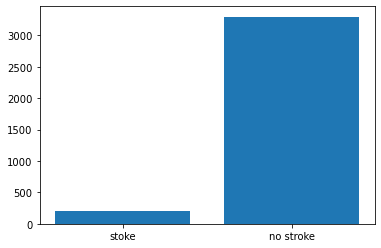

In [61]:
#split the data into those with stroke and without stroke
no_stroke = data[data['stroke'] == 0] #extract the information of those without stroke
no_stroke_extract = no_stroke['stroke'] #extract one column 

yes_stroke = data[data['stroke'] == 1] #extract the information of those with stroke
yes_stroke_extract = yes_stroke['stroke'] #extract one column

count = [yes_stroke_extract.count(), no_stroke_extract.count()]
labels = ('stoke', 'no stroke')

plt.bar(labels, count)
print ("number with stroke: ",yes_stroke_extract.count())
print ("number without stroke: ",no_stroke_extract.count())

Here I just extracted the stroke and no stroke values from the dataset and made a bargraph representing both.

In [62]:
#undersampling
class_no_stroke_extract = no_stroke.sample(800) 
sampled_data = pd.concat([class_no_stroke_extract, yes_stroke], axis=0)

#shuffle the data
sampled_data = sampled_data.sample(frac = 1)

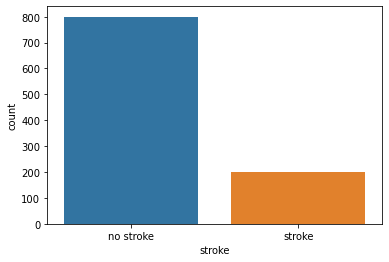

In [63]:
# visualize the output
g = sns.countplot(sampled_data['stroke'])
g.set_xticklabels(['no stroke','stroke'])
plt.show()

In [64]:
#The selected features based on the feature analysis and visualizations
X = sampled_data[['age','bmi', 'avg_glucose_level']] 
Y = sampled_data['stroke']

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [66]:
X_scaled

array([[ 0.15976011,  2.43160649, -0.2879666 ],
       [ 0.83961478, -0.39698845, -0.67829159],
       [ 1.36257991, -0.75777862,  0.13360796],
       ...,
       [ 0.42124267, -0.19592197,  1.7827605 ],
       [-1.14765272,  0.23800225,  0.5791602 ],
       [ 0.42124267,  1.30594116,  1.43429817]])

In [67]:
X.describe()

,age,bmi,avg_glucose_level
count,1002.000000,1002.000000,1002.000000
mean,51.945110,30.250826,112.331936
std,19.131283,6.932696,50.906087
min,13.000000,14.100000,55.120000
25%,36.000000,25.500000,78.072500
50%,53.000000,28.893237,93.890000
75%,68.000000,33.700000,119.985000
max,82.000000,71.900000,271.740000


## 6.2 PCA <a name="PCA"></a>

Principal Component Analysis (PCA): PCA is a technique for reducing the dimensionality of high-dimensional datasets.
In the stroke prediction dataset, we can use PCA to identify the most important features that contribute to the risk 
of stroke.


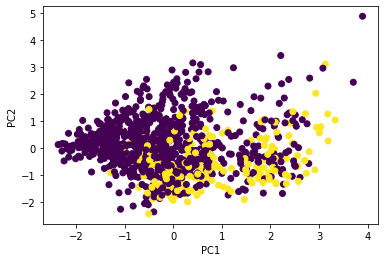

In [68]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the data in two dimensions
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= Y, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In this code, we first select a subset of features that we believe are important for predicting stroke risk.
We then standardize the features using StandardScaler() to ensure that all features are on the same scale. 
We apply PCA to the standardized features using PCA(n_components=2), which projects the data onto a two-dimensional
subspace. We then visualize the data in two dimensions using a scatter plot, with the color of each point indicating
whether the patient had a stroke or not.

In [69]:
from sklearn.decomposition import PCA
# Calculate the explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(cumulative_explained_variance)



[0.44167714 0.77121881]


The first principal component explains 45% of the total variance in the original dataset.
The first two principal components together explain 78% of the total variance in the original dataset.
The remaining variance, which is not captured by these two principal components, can be thought of as noise or unexplained variation in the original dataset

## 6.3 K-Means Clustering <a name="KMC"></a>

K-Means Clustering: K-means clustering is a technique for grouping data points into a fixed number of clusters based 
on their similarity. In the stroke prediction dataset, we can use K-means clustering to identify groups of patients 
who have similar risk factors for stroke.




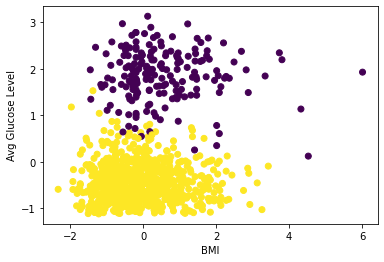

In [70]:
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=labels, cmap="viridis")
plt.xlabel("BMI")
plt.ylabel("Avg Glucose Level")
plt.show()

In this code, we first select the same subset of features as in the PCA example, and standardize the features using 
StandardScaler(). We apply K-means clustering to the standardized features using KMeans(n_clusters=2), which groups 
the data points into two clusters based on their similarity. We then visualize the clusters in a scatter plot, with 
the color of each point indicating which cluster it belongs to.

In [71]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette = silhouette_score(X_scaled, labels)
print("Silhouette score:", silhouette)

Silhouette score: 0.4046284741553633


A Silhouette score of 0.40 indicates that the clustering is reasonable and that the objects are relatively well matched to their own cluster compared to neighboring clusters. 

## 6.4 DB SCAN <a name="DBS"></a>

Density-Based Spatial Clustering of Applications with Noise (DBSCAN): DBSCAN is a clustering algorithm that groups 
together data points that are close together in high-density regions and separates out low-density regions as noise. 
In the stroke prediction dataset, we can use DBSCAN to identify patients who have similar risk factors for stroke 
and identify any outliers that may represent rare or unusual cases.




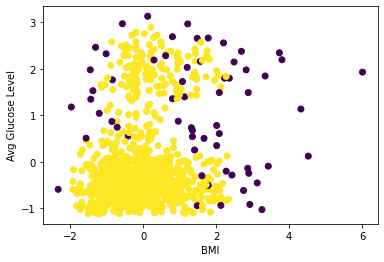

Silhouette score: 0.3288228961613537


In [72]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labelsd = dbscan.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=labelsd, cmap="viridis")
plt.xlabel("BMI")
plt.ylabel("Avg Glucose Level")
plt.show()

#The color black represents noise points which are not a part of any cluster

# Calculate the silhouette score
silhouette = silhouette_score(X_scaled, labelsd)
print("Silhouette score:", silhouette)

In this code, we first select the same subset of features as in the K-means clustering example and standardize 
the features using StandardScaler(). We apply DBSCAN to the standardized features 
using DBSCAN(eps=0.5, min_samples=5), which groups the data points into clusters based on their density and 
separates out low-density points as noise. We then visualize the clusters and noise points in a scatter plot, 
with the color of each point indicating which cluster it belongs to.

## 6.5 Hierarchical Clustering <a name="HRC"></a>

Hierarchical clustering is a type of clustering algorithm used in unsupervised machine learning, where the aim is to group similar data points together based on their distance or similarity measures. In hierarchical clustering, the data points are first considered as individual clusters, and then combined successively into larger clusters based on their similarities. This process continues until all the data points are in a single cluster, or until a certain stopping criteria is met. Hierarchical clustering can be divided into two types: agglomerative and divisive clustering. In agglomerative clustering, the process starts with individual data points being considered as separate clusters and then merged into larger ones, while divisive clustering starts with all data points in a single cluster and then successively split into smaller ones.

Number of clusters: 2, Silhouette score: 0.398
Number of clusters: 3, Silhouette score: 0.195
Number of clusters: 4, Silhouette score: 0.286
Number of clusters: 5, Silhouette score: 0.321
Number of clusters: 6, Silhouette score: 0.314
Number of clusters: 7, Silhouette score: 0.316
Number of clusters: 8, Silhouette score: 0.299
Number of clusters: 9, Silhouette score: 0.287
Number of clusters: 10, Silhouette score: 0.243


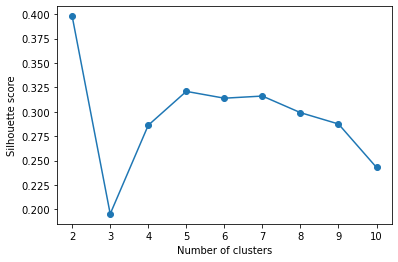

In [73]:
from sklearn.cluster import AgglomerativeClustering

# Determine the optimal number of clusters using the silhouette score
scores = []
for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
    labelsh = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labelsh)
    scores.append(score)
    print(f'Number of clusters: {k}, Silhouette score: {score:.3f}')

# Plot the silhouette scores
plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

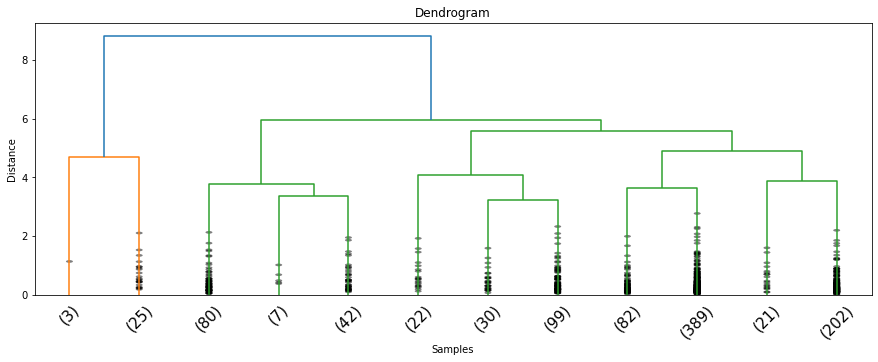

In [74]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Calculate the distance matrix using Euclidean distance
dist_matrix = pdist(X_scaled, metric='euclidean')

# Perform hierarchical clustering using the complete linkage method and 2 clusters
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
hc.fit(X_scaled)

# Plot the dendrogram
Z = linkage(dist_matrix, method='complete')
plt.figure(figsize=(15, 5))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# 7.Semi-Supervised Learning <a name="Semi_Supervised_Learning"></a>

Semi-supervised learning is a type of machine learning where a model is trained on a dataset that contains both labeled and unlabeled data. The model learns from the labeled data, and then uses that knowledge to make predictions on the unlabeled data. Semi-supervised learning is useful in situations where labeled data is scarce or expensive to obtain, but there is an abundance of unlabeled data available.

## 7.1 Label Propagation <a name="LabelP"></a>

Label propagation is a semi-supervised learning algorithm used for classification tasks. It is a graph-based method that works by propagating labels from labeled data points to unlabeled data points based on their similarity or distance.

In [75]:
from sklearn.semi_supervised import LabelPropagation

In [76]:
n_labeled = int(len(x_train) * 0.1)
X_train_labeled = x_train[:n_labeled]
y_train_labeled = y_train[:n_labeled]
X_train_unlabeled = x_train[n_labeled:]

Here we have removed the lables from 90% of the data. We only use the 10% of the total data as labeled data.

In [77]:
lp = LabelPropagation(kernel = 'rbf', gamma = 20)#kernal is set to radial basis function, gamma= its scaling parameter
lp.fit(X_train_labeled, y_train_labeled)
y_train_pred = lp.predict(X_train_unlabeled)
X_train_combined = np.concatenate([X_train_labeled, X_train_unlabeled])
y_train_combined = np.concatenate([y_train_labeled, y_train_pred])

The combined training set is used to train a classifier in a supervised learning setting, where the model can learn from both labeled and unlabeled data to improve its predictions.

1) Decision tree classifier is instantiated and trained on the combined labeled and pseudo-labeled training data. Then, the trained classifier is used to predict the stroke risk on the test data.

Accuracy of classifier 1: 0.899103139013453
Confusion matrix of classifier 1:


<AxesSubplot:>

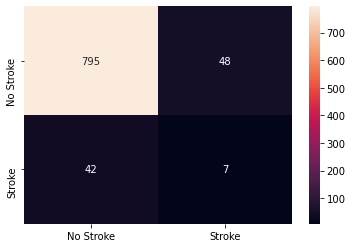

In [78]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_combined, y_train_combined)
y_test_pred = dtc.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy of classifier 1:', accuracy)
print('Confusion matrix of classifier 1:')
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm, index=['No Stroke', 'Stroke'], columns=['No Stroke', 'Stroke'])
sns.heatmap(cm_df, annot=True, fmt='d')

2) Here we train logistic regression classifier on the combined labeled and pseudo-labeled data (X_train_combined and y_train_combined) and then evaluating its performance on the test data (x_test and y_test).

Accuracy of classifier 2: 0.9417040358744395
Confusion matrix of classifier 2:


<AxesSubplot:>

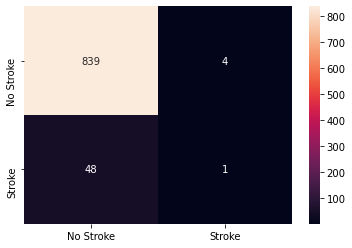

In [79]:
log = LogisticRegression()
log.fit(X_train_combined, y_train_combined)
y_test_pred = log.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy of classifier 2:', accuracy)
print('Confusion matrix of classifier 2:')
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm, index=['No Stroke', 'Stroke'], columns=['No Stroke', 'Stroke'])
sns.heatmap(cm_df, annot=True, fmt='d')

We can see good accuracy scores from both of the classifiers but we can see that Logistic Regression outperforms the Decision Tree classifier.

# 8. Comparision with other Studies <a name="CWOS"></a>

Since we picked our data from kaggle there are alot of other people who have done their analysis unfortunately there are not many notebooks which have done all the Learning Methods as I have performed.

However, we can compare the results with different a file for example this one:
https://www.kaggle.com/code/muqarrishzaib/stroke-risk-predictive-analysis
<p>Here we can see that the highest accuracy recieved is by SVM which is 93.93%.</p>
<p>Our Random Forest after the Grid Search performs better and gives an accuracy of 94.4</p>
<p>We cannot compare further as the analysis found on that notebook ends on the supervised learning. Though if needed you can check other notebooks through this
<a href="https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/code?datasetId=1120859&sortBy=relevance">link.</a></p>

